# IA tema central

## Data

In [1]:
import newspaper
import pandas as pd
from tqdm import tqdm

data = pd.read_csv("data/contenido_2023_04_05_matriz_not_julia.csv")
data

,Unnamed: 0.1,Unnamed: 0,N,n_periodico,enlace,Medio,año,Fecha,Nombreperiodista,Nombreperiodista_A,...,@25perspectiva,@25piedefoto,@26ge3ero1oto,@26perspectiva,@26piedefoto,@27ge3ero1oto,@27perspectiva,@27piedefoto,contenido,contenido_clean
0,3246,3246,3162,357,https://elpais.com/tecnologia/2018/10/08/actua...,4,2018,9/10/2018,EVGENY MOROZOV,EVGENY MOROZOV,...,,,,,,,,,En medio de la angustia generalizada que provo...,medio angustia generalizado provocar inevitabl...
1,3615,3615,3572,767,https://elpais.com/tecnologia/2018/02/23/actua...,4,2018,25/2/2018,SANTIAGO MILLÁN ALONSO Y RAMÓN MUÑOZ,SANTIAGO MILLÁN ALONSO Y RAMÓN MUÑOZ,...,,,,,,,,,"Telefónica ya tiene en marcha Aura, su mayor a...",telefónica marcha aura mayor apuesta tecnoló...
2,882,882,513,351,https://www.lavanguardia.com/tecnologia/202010...,2,2020,22/10/2020,JUDITH VIVES,JUDITH VIVES,...,,,,,,,,,Si hay una herramienta que ha servido para man...,si herramienta servir manipular imagen pasado ...
3,1322,1322,960,798,https://www.lavanguardia.com/tecnologia/201806...,2,2018,12/6/2018,JUDITH VIVES,JUDITH VIVES,...,,,,,,,,,Uber desarrollará una tecnología basada en la ...,uber desarrollar tecnología basado inteligenci...
4,1157,1157,789,627,https://www.lavanguardia.com/tecnologia/201905...,2,2019,18/5/2019,ALBERTO BARBIERI,ALBERTO BARBIERI,...,,,,,,,,,"El pasado 28 de enero, la revista Motherboard ...",pasado 28 enero revista motherboard publicar...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,3716,3716,3680,875,https://elpais.com/tecnologia/2017/10/31/actua...,4,2017,4/11/2017,JOSÉ MENDIOLA ZURIARRAIN,JOSÉ MENDIOLA ZURIARRAIN,...,,,,,,,,,La reciente llegada del Pixel 2 XL de Google n...,reciente llegada pixel 2 xl google hacer sino ...
7996,3279,3279,3202,397,https://elpais.com/tecnologia/2018/08/31/actua...,4,2018,31/09/2018,JAVIER SALAS,JAVIER SALAS,...,,,,,,,,,"""¿Te importaría salir de la habitación, por fa...",importar salir habitación favor inespera...
7997,2310,2310,2128,1131,https://www.elmundo.es/eme/diseno/2018/06/14/5...,3,2018,14/6/2018,JUANJO BECERRA,JUANJO BECERRA,...,,,,,,,,,Miren la imagen de la derecha. verán retratado...,mirar imagen derecha ver retratado varón 30 ...
7998,3261,3261,3182,377,https://elpais.com/tecnologia/2018/09/16/actua...,4,2018,17/9/2018,JORDI PÉREZ COLOMÉ,JORDI PÉREZ COLOMÉ,...,,,,,,,,,Un ciudadano acude a una comisaría a presentar...,ciudadano acudir comisaría presentar denuncia ...


In [2]:
# Eliminar filas donde "contenido" esté vacío o NaN
data = data.dropna(subset=['contenido'])

# Verificar que ya no haya valores NaN
print(data['contenido'].isna().sum())


0


## Labels

In [3]:
label2id = {
    "No": 0,
    "Sí": 1
}

id2label = {
    0: "No",
    1: "Sí"
}



/tmp/ipykernel_8842/3905220353.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=tema_counts.index, y=tema_counts.values, palette="viridis")


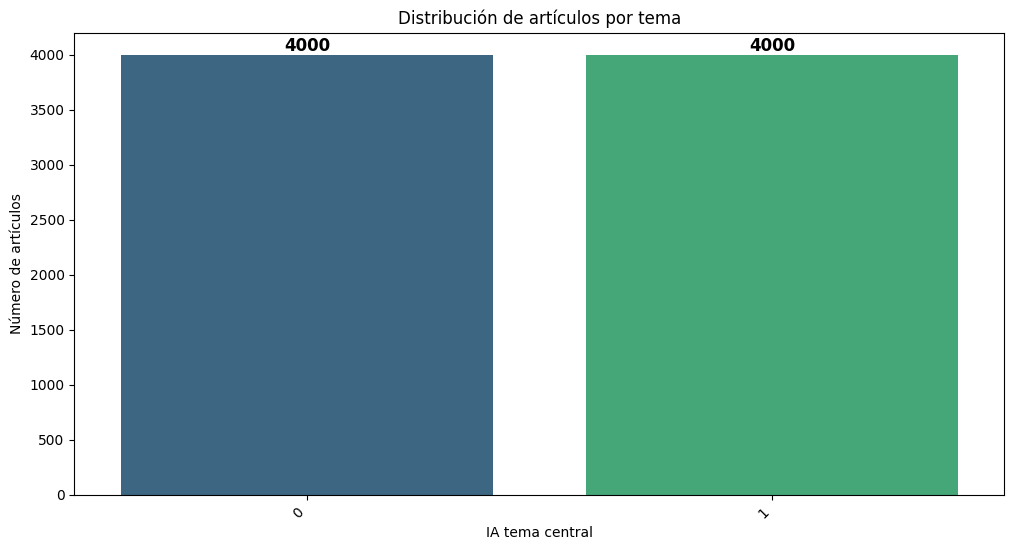

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar la cantidad de artículos por tema
tema_counts = data['IAtemacentral'].value_counts()

# Crear el gráfico
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=tema_counts.index, y=tema_counts.values, palette="viridis")

# Agregar los números en cada barra con la posición correcta
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=12, fontweight='bold', color='black')

# Rotar las etiquetas del eje x
plt.xticks(rotation=45, ha="right")

# Agregar títulos y etiquetas
plt.xlabel("IA tema central")
plt.ylabel("Número de artículos")
plt.title("Distribución de artículos por tema")

# Mostrar el gráfico
plt.show()


### Balanceo de clases

/tmp/ipykernel_8842/442355858.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=balanced_data['IAtemacentral'].value_counts().index,


IAtemacentral
0    4000
1    4000
Name: count, dtype: int64


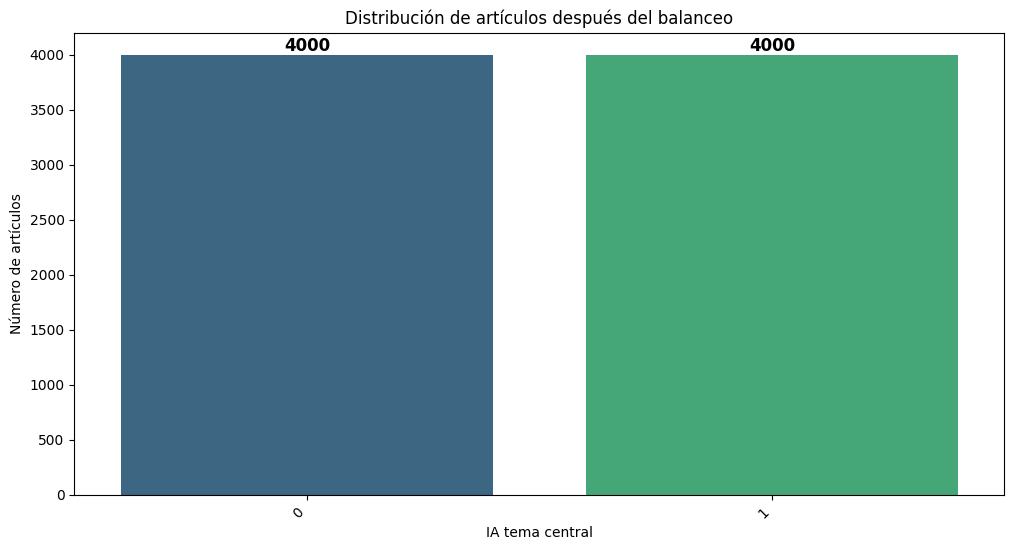

In [5]:
from sklearn.utils import resample

# Obtener la cantidad máxima de artículos en una clase
max_count = data['IAtemacentral'].value_counts().max()

# Lista para almacenar los nuevos datos balanceados
balanced_data = []

# Aplicar sobremuestreo a cada clase
for tema, subset in data.groupby('IAtemacentral'):
    balanced_subset = resample(subset, replace=True, n_samples=max_count, random_state=42)
    balanced_data.append(balanced_subset)

# Combinar todas las clases balanceadas
balanced_data = pd.concat(balanced_data)
data = balanced_data

# Mostrar la distribución después del balanceo
print(balanced_data['IAtemacentral'].value_counts())

# Graficar la nueva distribución
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=balanced_data['IAtemacentral'].value_counts().index, 
                 y=balanced_data['IAtemacentral'].value_counts().values, palette="viridis")

# Agregar números en cada barra
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.xticks(rotation=45, ha="right")
plt.xlabel("IA tema central")
plt.ylabel("Número de artículos")
plt.title("Distribución de artículos después del balanceo")
plt.show()


## Train

In [6]:
from sklearn.model_selection import train_test_split

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    data['contenido_clean'], data['IAtemacentral'], test_size=0.2, random_state=42, stratify=balanced_data['IAtemacentral'],
)

NameError: name 'train_test_split' is not defined

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Crear pipeline de vectorización y modelo
model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', LogisticRegression(max_iter=1000))
])

# Entrenar modelo
model.fit(X_train, y_train)

# Evaluar modelo
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=id2label.values()))

## Explicabilidad

In [7]:
from lime.lime_text import LimeTextExplainer

explainer = LimeTextExplainer(class_names=list(id2label.values()))

def explain_instance(text):
    exp = explainer.explain_instance(
        text, 
        model.predict_proba, 
        num_features=len(id2label), 
        labels=list(range(len(id2label))),  # Especificar todas las clases
        multi_class="ovo"  # Modo multiclase (ovo/ovr)
    )
    return exp.show_in_notebook()


# Elegir un texto de prueba y explicarlo
explain_instance(X_test.iloc[6])


NameError: name 'X_test' is not defined